# Домашнее задание по теме: несбалансированные данные (Imbalanced Data)

## Подготовка окружения

In [1]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

# Для MacOS/Ubuntu
# !which pip

# Для Windows
# !where pip

In [2]:
# !conda install pandas matplotlib numpy seaborn -y

In [3]:
# !pip install imbalanced-learn

In [4]:
import numpy as np

np.__version__

'1.19.2'

In [5]:
import pandas as pd

pd.__version__

'1.2.1'

In [6]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.__version__

'3.3.4'

In [7]:
import seaborn as sns

sns.__version__

'0.11.1'

In [8]:
import imblearn

imblearn.__version__

'0.8.0'

## Загрузка данных

[Источник (Hotel booking demand)](https://www.kaggle.com/jessemostipak/hotel-booking-demand)

[Описание колонок](https://www.sciencedirect.com/science/article/pii/S2352340918315191#t0005)

ВНИМАНИЕ: Предварительно датасет необходимо скачать к себе на локальный компьютер.

In [9]:
# загрузить датасет в pandas dataframe
df = pd.read_csv('hotels/hotel_bookings.csv')

# вывести первые 5 и последние 5 строк
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


## Анализ графических данных

*Ответы на вопросы написать в отдельной ячейке типа `markdown` и/или в комментариях к коду.

- Предположим, что модель будет предсказывать результаты колонки `is_repeated_guest`.

- Проанализировать содержание колонки `is_repeated_guest`:
    - Используя график `seaborn.countplot` показать соотношение значений.
    - Вычислить процент соотношения значений (сколько процентов `True` и `False` в этой колонке).
    - Насколько сильно не сбалансирован дата сет?


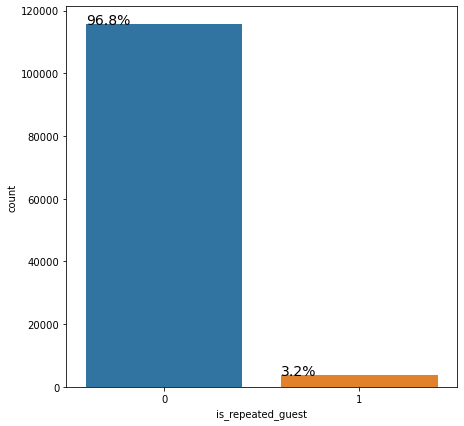

In [72]:
def countplot(data, x):
    fig, ax = plt.subplots(1, 1, figsize=(7,7))
    sns.countplot(data=data, x=x, ax=ax)
    total = len(data)
    for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/total)
            x_pos = p.get_x()
            y_pos = p.get_y() + p.get_height()
            ax.annotate(percentage, xy=(x_pos, y_pos), fontsize=14)
countplot(df, 'is_repeated_guest')

Дата сет не сбалансирован, уровень - Moderate 

## Подготовка данных

- Разделить дата сет на две части:
    - `X` - все колонки кроме `is_repeated_guest`.
    - `y` - только колонка `is_repeated_guest`

**ВНИМАНИЕ:** колонка `is_repeated_guest` не последняя, важно правильно ее "вырезать" (допустим любой работающий способ).

In [74]:
X = df.drop(['is_repeated_guest'], axis=1)
y = df[['is_repeated_guest']]

## Oversampling

*Ответы на вопросы написать в отдельной ячейке типа `markdown` и/или в комментариях к коду.

- Используя класс `RandomOverSampler` из пакета `imbalanced-learn` преобразовать `X` и `y` таким образом, чтобы класс меньшинства получил 75% примеров по сравнению с классом большинства. То есть в результате должно быть примерно такое соотношение: `57.1`/`42.9`.

- Вычислить насколько больше стало записей в датасете после этого преобразования. Какие есть идеи по этому поводу? Много это или мало?

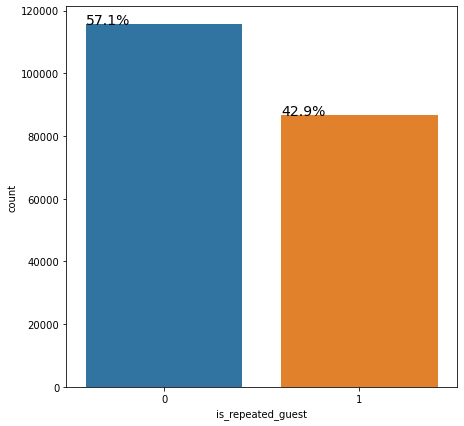

In [79]:
over_sample = imblearn.over_sampling.RandomOverSampler(sampling_strategy=0.75)
X_over, y_over = over_sample.fit_resample(X, y)
countplot(y_over, 'is_repeated_guest')

In [86]:
len(X_over) - len(df)

82875

Прибавилось 82875, что довольно много относительно исходного датасета

## Oversampling

*Ответы на вопросы написать в отдельной ячейке типа `markdown` и/или в комментариях к коду.

- Используя класс `RandomUnderSampler` из пакета `imbalanced-learn` преобразовать `X` и `y` таким образом, чтобы их соотношение стало 50/50.

- Вычислить насколько меньше стало записей в датасете после этого преобразования. Какие есть идеи по этому поводу? Много это или мало?

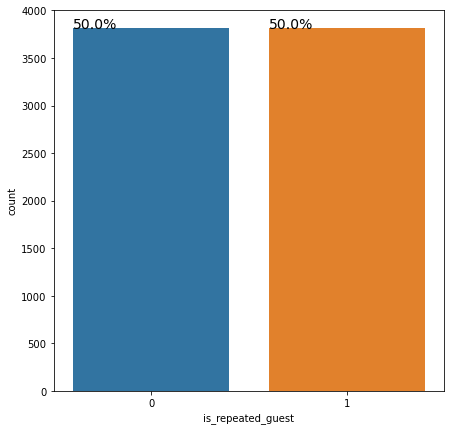

In [87]:
under_sample = imblearn.under_sampling.RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = under_sample.fit_resample(X, y)
countplot(y_under, 'is_repeated_guest')

In [91]:
len(df) - len(X_under)

111770

Датасет уменьшился на 111770 записей, что очень много относительно исходного датасета